#  Day 3 – Classifier Arena
## Focus: Classification & Evaluation Metrics
**Topics Covered:**  
- Logistic Regression  
- Linear Discriminant Analysis (LDA)  
- Evaluation Metrics: Accuracy, Confusion Matrix, ROC-AUC


In [2]:
import pandas as pd
df = pd.read_csv('/content/mental_health_workplace_survey.csv')
df.head()


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
df['BurnoutBinary'] = df['BurnoutLevel'].apply(lambda x: 1 if x >= 6 else 0)
df['BurnoutBinary'].value_counts()


,count
BurnoutBinary,
0,1677
1,1323


In [4]:
df.drop(['EmployeeID', 'BurnoutLevel'], axis=1, inplace=True)


In [5]:
df = pd.get_dummies(df, drop_first=True)


In [6]:
X = df.drop('BurnoutBinary', axis=1)
y = df['BurnoutBinary']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
y_prob_lda = lda.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]


🔹 Logistic Regression
Accuracy: 0.8816666666666667
Confusion Matrix:
 [[335   0]
 [ 71 194]]
ROC-AUC Score: 0.8489777527457054


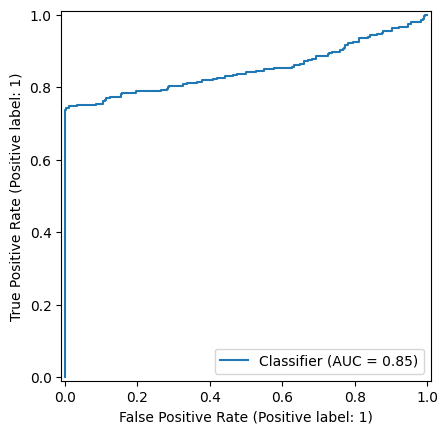

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_probs))

RocCurveDisplay.from_predictions(y_test, log_reg_probs)


🔹 Linear Discriminant Analysis (LDA)
Accuracy: 0.8816666666666667
Confusion Matrix:
 [[335   0]
 [ 71 194]]
ROC-AUC Score: 0.8499239650802591


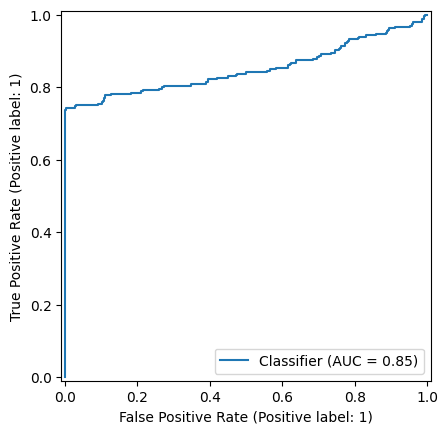

In [ ]:
print("🔹 Linear Discriminant Analysis (LDA)")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lda))

RocCurveDisplay.from_predictions(y_test, y_prob_lda)


##  Model Comparison Summary

| Model                        | Accuracy | ROC-AUC | Confusion Matrix         |
|-----------------------------|----------|---------|--------------------------|
| Logistic Regression         | 88.17%   | 0.8489  | [[335, 0], [71, 194]]    |
| Linear Discriminant Analysis| 88.17%   | 0.8499  | [[335, 0], [71, 194]]    |

### Conclusion:
Both models showed equal accuracy and confusion matrices. However, **LDA slightly outperformed Logistic Regression** in ROC-AUC score, indicating better performance in distinguishing classes under imbalanced conditions.
